# Tourist Numbers Univariate Forecasting

Bu çalışmada turist sayılarını zamana göre verilen değerlere bağlı olarak time series analiz yapılıp, sonraki süreçte tahminleme yapılması amaçlanmıştır.

<img src="tourist.jpg" width="100%"></img>

### About Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime, timedelta
rcParams['figure.figsize'] = 15, 6 # hep 15, 6 olsun diye ayarlıyruz.

In [2]:
data = pd.read_csv('data.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

    Date  TouristNumber
0  33604           8414
1  33635           9767
2  33664          13805
3  33695          12987
4  33725          32190

 Data Types:
Date             int64
TouristNumber    int64
dtype: object


In [3]:
# date formating
data["Date"]=data["Date"].apply(lambda x: (datetime.utcfromtimestamp(0) + timedelta(x)).strftime("%Y-%m-%d"))

In [4]:
data

,Date,TouristNumber
0,2062-01-02,8414
1,2062-02-02,9767
2,2062-03-03,13805
3,2062-04-03,12987
4,2062-05-03,32190
...,...,...
283,2085-08-02,82593
284,2085-09-02,53472
285,2085-10-02,30361
286,2085-11-02,25436


In [5]:
#convert to time series:
ts = data['TouristNumber']
ts.head(10)

0     8414
1     9767
2    13805
3    12987
4    32190
5    46383
6    57570
7    52261
8    30125
9    17522
Name: TouristNumber, dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

In [15]:
data=data.set_index('Date')

In [16]:
data

,TouristNumber
Date,
2062-01-02,8414
2062-02-02,9767
2062-03-03,13805
2062-04-03,12987
2062-05-03,32190
...,...
2085-08-02,82593
2085-09-02,53472
2085-10-02,30361


In [17]:
data.index

DatetimeIndex(['2062-01-02', '2062-02-02', '2062-03-03', '2062-04-03',
               '2062-05-03', '2062-06-03', '2062-07-03', '2062-08-03',
               '2062-09-03', '2062-10-03',
               ...
               '2085-03-02', '2085-04-02', '2085-05-02', '2085-06-02',
               '2085-07-02', '2085-08-02', '2085-09-02', '2085-10-02',
               '2085-11-02', '2085-12-02'],
              dtype='datetime64[ns]', name='Date', length=288, freq=None)

In [18]:
#convert to time series:
ts = data['TouristNumber']
ts.head(10)

Date
2062-01-02     8414
2062-02-02     9767
2062-03-03    13805
2062-04-03    12987
2062-05-03    32190
2062-06-03    46383
2062-07-03    57570
2062-08-03    52261
2062-09-03    30125
2062-10-03    17522
Name: TouristNumber, dtype: int64

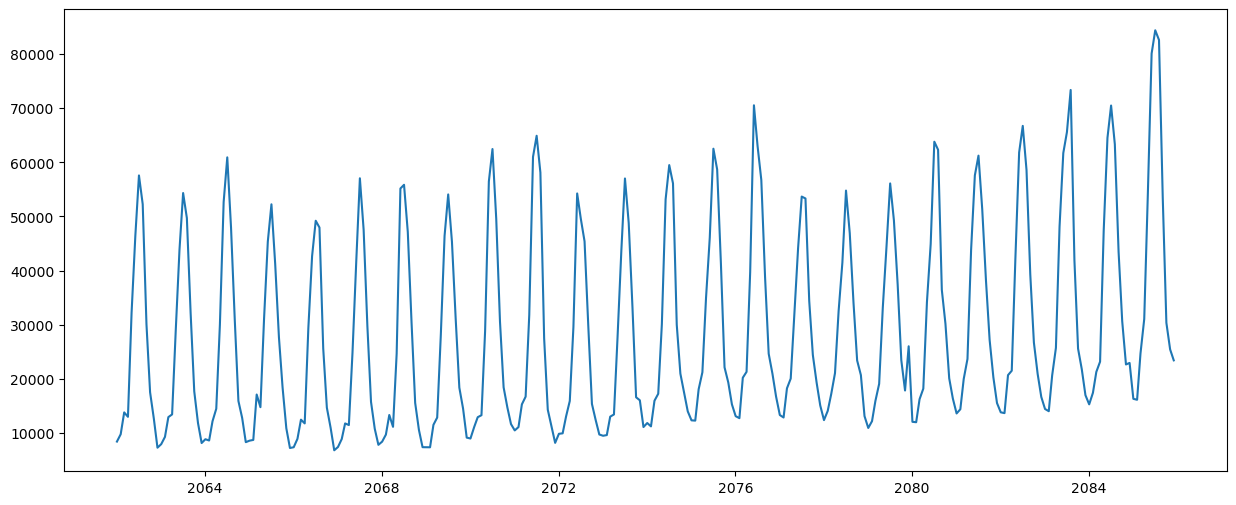

In [19]:
plt.plot(ts)

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

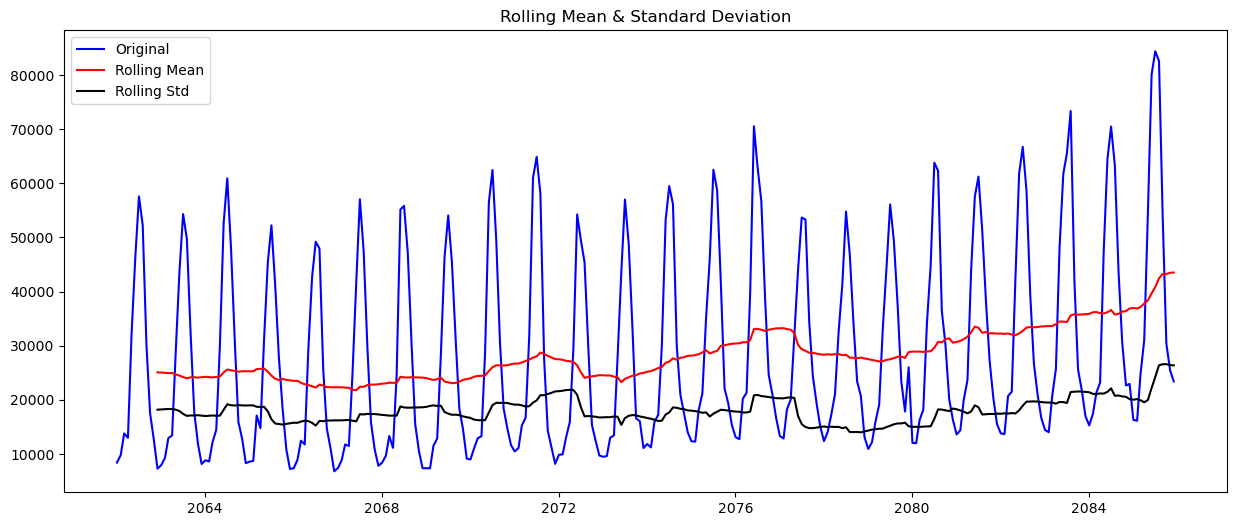

Results of Dickey-Fuller Test:
Test Statistic                   1.247470
p-value                          0.996298
#Lags Used                      13.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64


In [21]:
test_stationarity(ts)

### Time Series Stationary

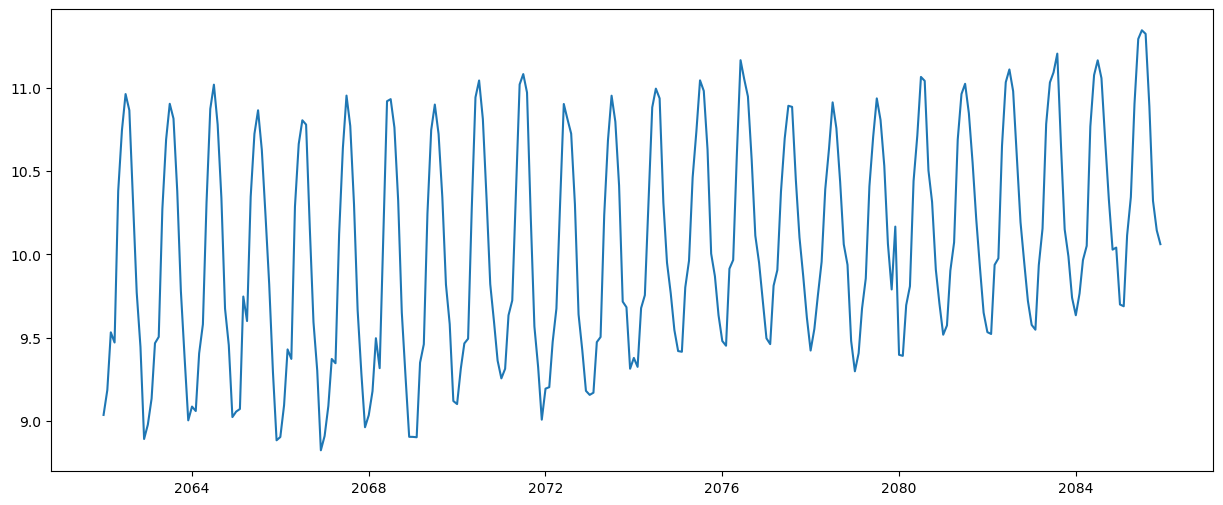

In [22]:
ts_log = np.log(ts)
plt.plot(ts_log)

# Estimating & Eliminating Trend

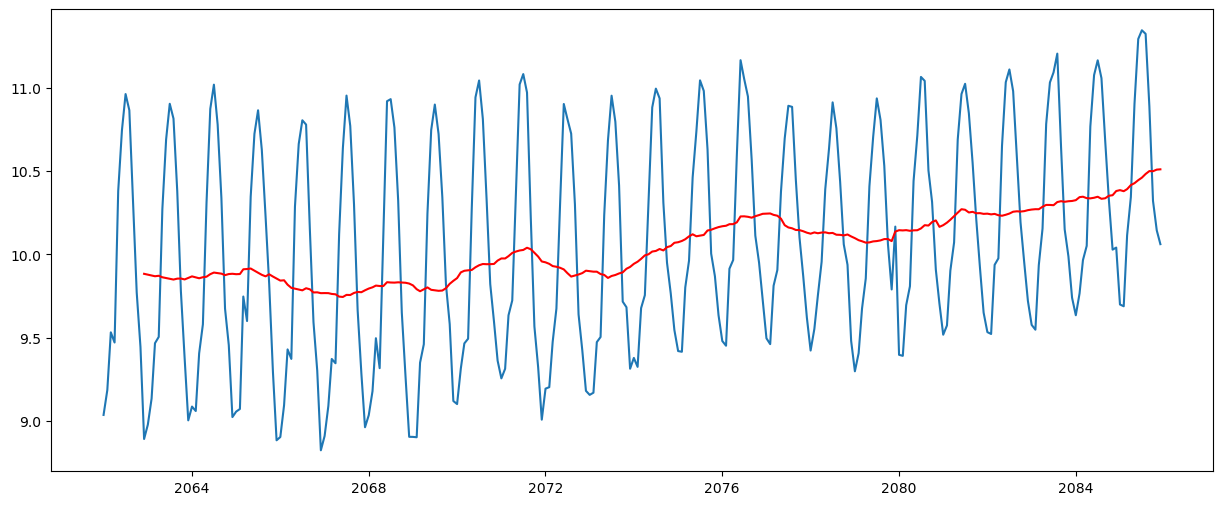

In [23]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

### Moving average

In [24]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2062-01-02         NaN
2062-02-02         NaN
2062-03-03         NaN
2062-04-03         NaN
2062-05-03         NaN
2062-06-03         NaN
2062-07-03         NaN
2062-08-03         NaN
2062-09-03         NaN
2062-10-03         NaN
2062-11-03         NaN
2062-12-03   -0.989857
Name: TouristNumber, dtype: float64

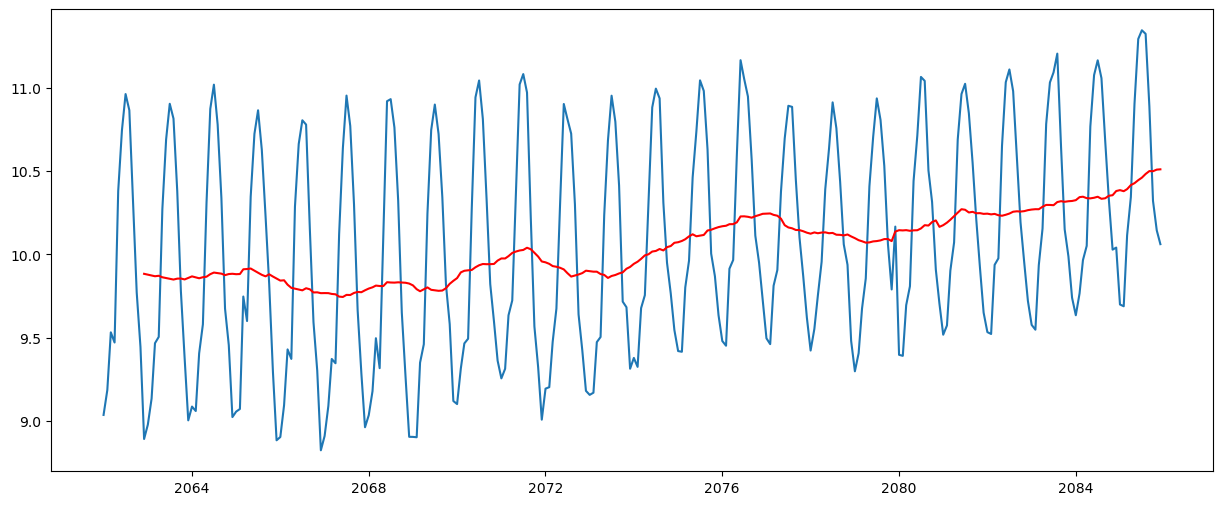

In [25]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [26]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2062-12-03   -0.989857
2063-01-03   -0.899045
2063-02-03   -0.738412
2063-03-03   -0.401306
2063-04-03   -0.366333
Name: TouristNumber, dtype: float64

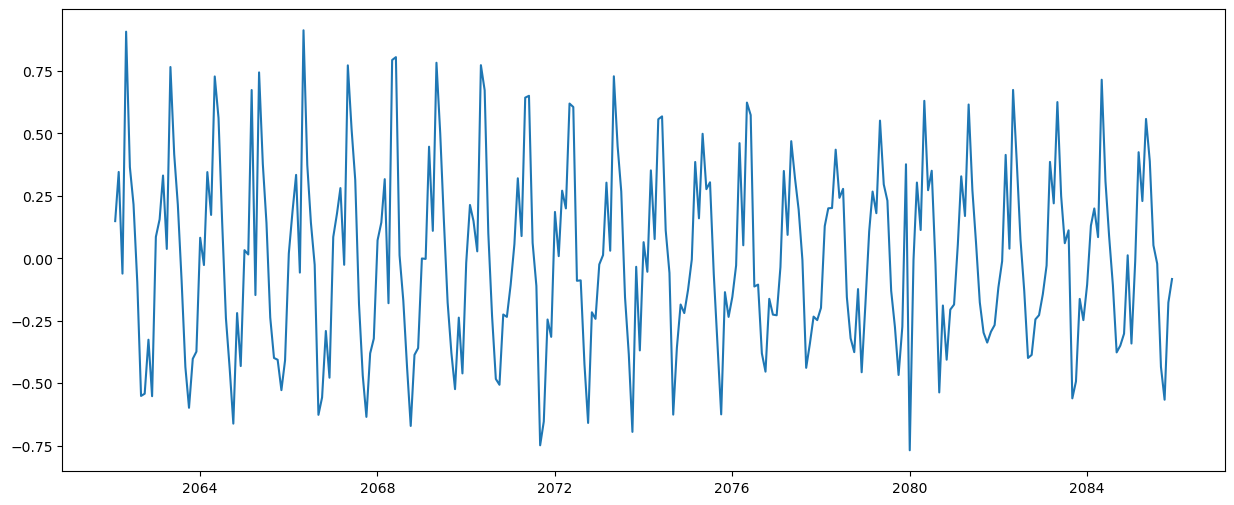

In [27]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

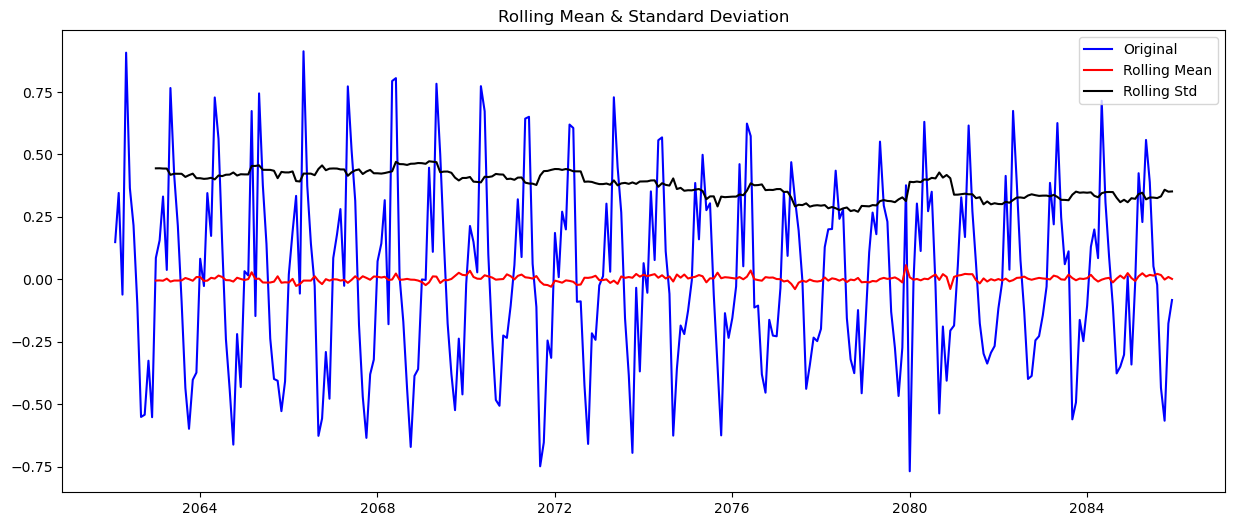

Results of Dickey-Fuller Test:
Test Statistic                -6.231325e+00
p-value                        4.945301e-08
#Lags Used                     1.300000e+01
Number of Observations Used    2.730000e+02
Critical Value (1%)           -3.454533e+00
Critical Value (5%)           -2.872186e+00
Critical Value (10%)          -2.572443e+00
dtype: float64


In [28]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Forecasting a Time Series

In [30]:
from statsmodels.tsa.arima_model import ARIMA

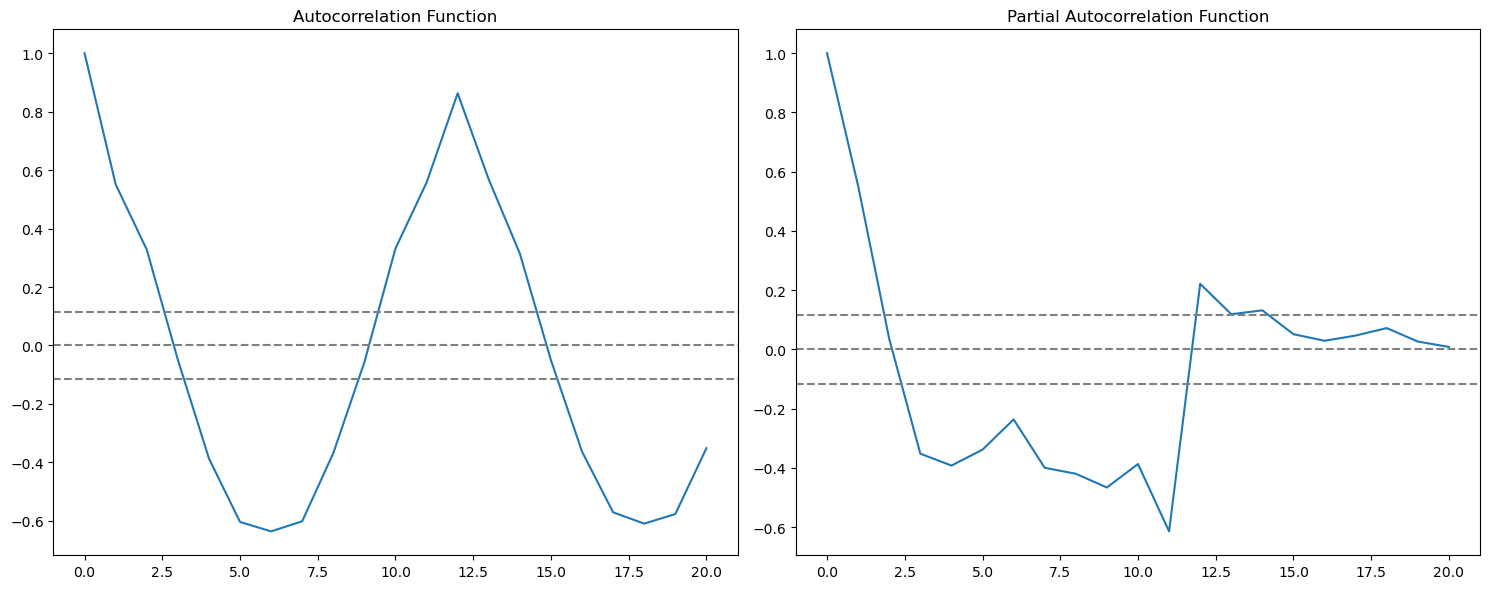

In [31]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [32]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

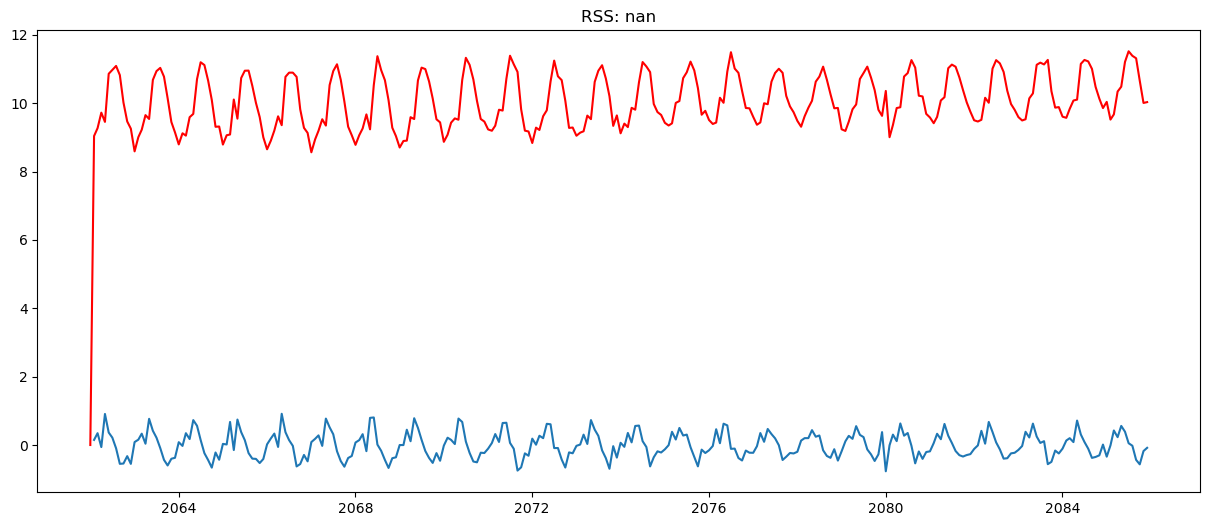

In [33]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

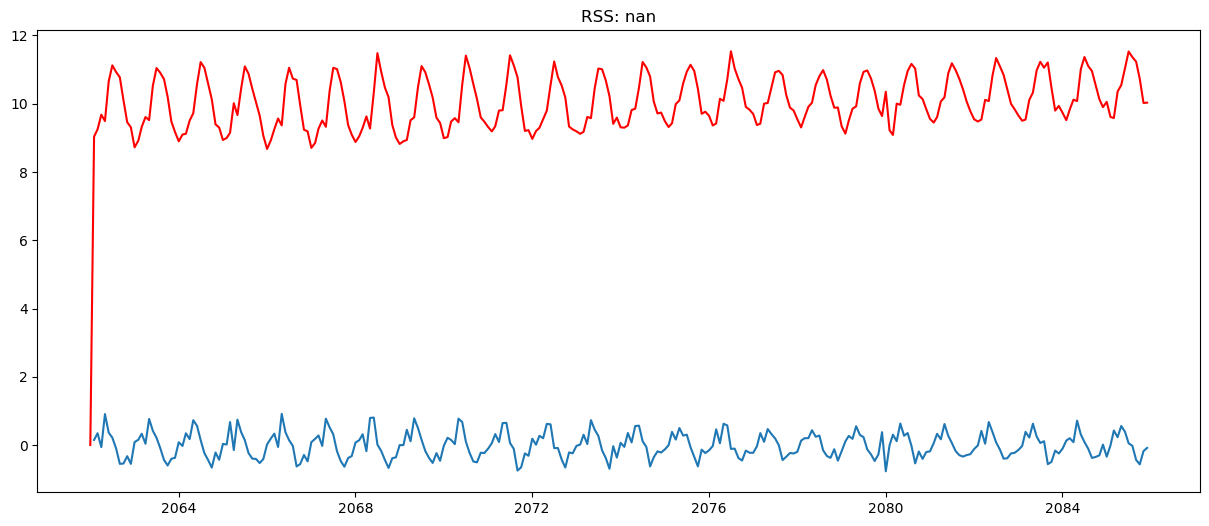

In [34]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model

C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

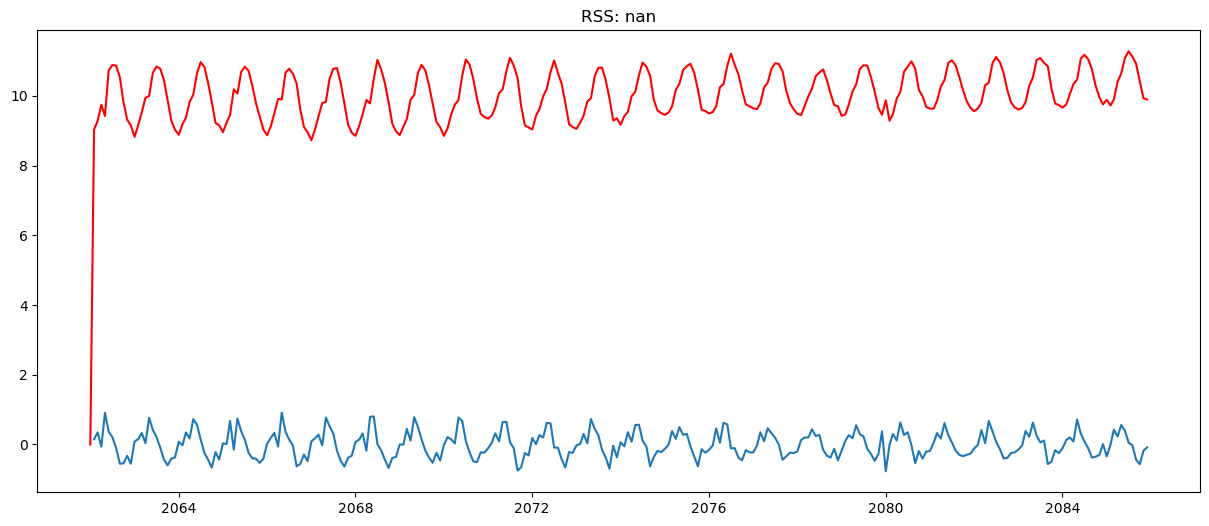

In [35]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2062-01-02    0.000000
2062-02-02    9.037653
2062-03-03    9.276823
2062-04-03    9.748018
2062-05-03    9.424932
dtype: float64

In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2062-01-02     0.000000
2062-02-02     9.037653
2062-03-03    18.314476
2062-04-03    28.062494
2062-05-03    37.487426
dtype: float64

In [38]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2062-01-02     9.037652
2062-02-02    18.075305
2062-03-03    27.352128
2062-04-03    37.100146
2062-05-03    46.525079
dtype: float64

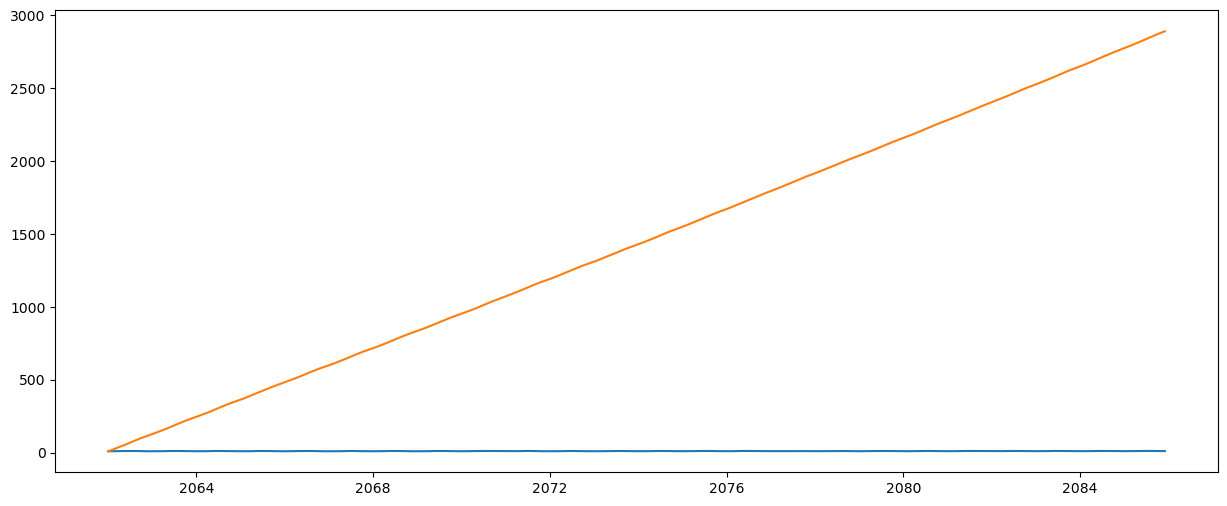

In [39]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

C:\Users\BA\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'RMSE: inf')

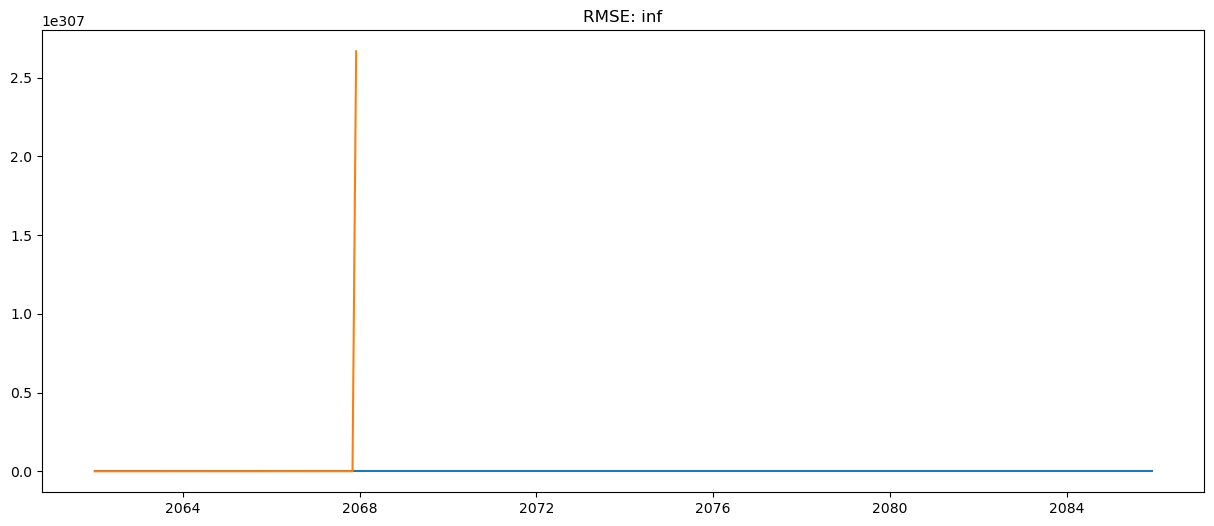

In [40]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))